# Dealing With Missing Data

When you first acquire  a new data set, it is very likely that there will be missing data. This may arise  for a multitude of reasons. However the first step is to identify the missing values. In many cases, the value will be blank, listed as NA or Nan. In python, these are recognized 'missing values'. However, other missing values may require domain knowledge. In our example here, we will focus on a column of FICO scores. You may look over your data of FICO scores and at first glance you see no missing values. You find the range of the values and see that they fall between -5 to 999. However, with your expect FICO knowledge, you know that FICO score ranges from 300 to 850. You must treat any values outside of this range as missing. Once you have recognized which values you need to deal with, you can choose you approach. 

In this tutorial, we will work with two similar fabricated data sets relating to FICO scores. The first is profiles of many applicants at the time of application of credit card -- point in time data. The second is data following the FICO score of an approved credit card applicant  over 3 years-- a time series data set. 


First, we will import the point in time dataset and get a feel for it.



In [282]:
#but first imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 
import statsmodels.formula.api as smf
%matplotlib inline

number of missing values = 2
min = -5.0 max = 999.0


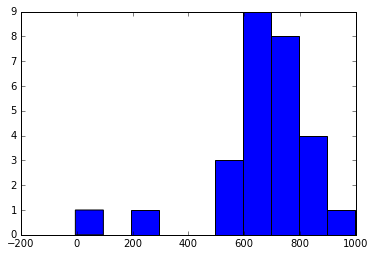

,FICO,Income,Age,Marital_Status,Gender,Number_Lines,Outstanding_Debt,Open_Cards_Past_6_Months
0,620.0,40000,29,M,M,1,20000,0
1,790.0,320000,52,M,F,6,0,2
2,749.0,60000,34,S,M,2,40000,0
3,789.0,180000,41,S,M,3,0,1
4,680.0,90000,47,M,M,7,200,3
5,740.0,100000,56,S,M,4,40,2
6,600.0,20000,44,M,F,5,2000,2
7,666.0,40000,40,M,F,6,5000,0
8,200.0,50000,59,M,F,6,1000,0
9,NaN,80000,27,S,M,0,1000,3


In [241]:
APP=pd.read_csv("FICO_initial.csv")
nummissing=(APP.FICO.isnull().sum()) 
print "number of missing values =" , nummissing
minvalue=min(APP.FICO)
maxvalue=max(APP.FICO)
print "min =", minvalue, "max =",  maxvalue
b=plt.hist(APP.FICO.dropna())
plt.show()
APP

Here, we have printed the data frame. Then focusing on the FICO column, we counted the number of blank values, calculated the min and max and then plotted the values. We can see that there are several problems with this data set, specifically related to the FICO column. There are 2 two missing values. Additionally, there are values that are not valid FICO scores. We can see the min is -5 and the max is 999. We can also see from the plot that there are values between 0 and 300.


### Removing Missing Values
The easiest way to deal with missing data is to drop the rows from the data set completely. In pandas this can be done by:

In [242]:

cleanAPP=APP.dropna()
nummissing=(cleanAPP.FICO.isnull().sum()) 
print "number of missing values =" , nummissing
cleanAPP.head(n=10)

number of missing values = 0


,FICO,Income,Age,Marital_Status,Gender,Number_Lines,Outstanding_Debt,Open_Cards_Past_6_Months
0,620.0,40000,29,M,M,1,20000,0
1,790.0,320000,52,M,F,6,0,2
2,749.0,60000,34,S,M,2,40000,0
3,789.0,180000,41,S,M,3,0,1
4,680.0,90000,47,M,M,7,200,3
5,740.0,100000,56,S,M,4,40,2
6,600.0,20000,44,M,F,5,2000,2
7,666.0,40000,40,M,F,6,5000,0
8,200.0,50000,59,M,F,6,1000,0
10,-5.0,70000,50,S,F,1,0,0


This will drop the entire row for which for which there is an NA present in any column. However, this does not solve our problem of rows with invalid FICO scores. You can either convert your values to Na and then drop them, drop your specified values or keep specified values. All options are shown below.

In [244]:

#replace all values with nan, then drop as before
APP.FICO.replace(to_replace=200, value=np.nan,inplace=True) #change specific value to na 


APP['FICO']=APP['FICO'].apply(lambda x: np.nan if x >850 else x)   # change all values above 850 to na
APP['FICO']=APP['FICO'].apply(lambda x: np.nan if x <300 else x)
cleandf=APP.dropna() 


# keeps specific values 
APP[APP.FICO >300] # keep only values above 300
APP[APP.FICO < 850]  #keep only values below 850

# drop specific values
APP[APP.FICO != -999]  # drop when FICO is -9999

cleandf

,FICO,Income,Age,Marital_Status,Gender,Number_Lines,Outstanding_Debt,Open_Cards_Past_6_Months
0,620.0,40000,29,M,M,1,20000,0
1,790.0,320000,52,M,F,6,0,2
2,749.0,60000,34,S,M,2,40000,0
3,789.0,180000,41,S,M,3,0,1
4,680.0,90000,47,M,M,7,200,3
5,740.0,100000,56,S,M,4,40,2
6,600.0,20000,44,M,F,5,2000,2
7,666.0,40000,40,M,F,6,5000,0
11,820.0,90000,67,M,M,3,0,3
12,669.0,130000,45,M,F,5,500,2


### Imputation

However, we may want to keep the rows with the missing data. If you drop the entire row, you may be deleting important information in the other columns. 

#### Mean Imputation

The simplest variation of imputation is mean imputation. You can take the mean of the value that do exist and replace the missing values with the mean. This can be done to keep the mean value of the data set the same.




In [248]:
#first find the mean , then replace na with the mean, 
#you will need to replace all of your 'missing values' with na as detailed above'
m=np.mean(APP.FICO)
print "The mean of our data is", m
MAPP=APP.fillna(int(m))

#if you have multiple rows with na values and you need to specify which column to fill
MAPP2=APP['FICO'].fillna(value=m)


MAPP

The mean of our data is 692.086956522


,FICO,Income,Age,Marital_Status,Gender,Number_Lines,Outstanding_Debt,Open_Cards_Past_6_Months
0,620.0,40000,29,M,M,1,20000,0
1,790.0,320000,52,M,F,6,0,2
2,749.0,60000,34,S,M,2,40000,0
3,789.0,180000,41,S,M,3,0,1
4,680.0,90000,47,M,M,7,200,3
5,740.0,100000,56,S,M,4,40,2
6,600.0,20000,44,M,F,5,2000,2
7,666.0,40000,40,M,F,6,5000,0
8,692.0,50000,59,M,F,6,1000,0
9,692.0,80000,27,S,M,0,1000,3


### Median Imputation
Very similarly, you can use the median.

In [263]:
m=np.median(cleandf.FICO)
print "The mean of our data is", m
MMAPP=APP.fillna(int(m))
MMAPP

The mean of our data is 680.0


,FICO,Income,Age,Marital_Status,Gender,Number_Lines,Outstanding_Debt,Open_Cards_Past_6_Months
0,620.0,40000,29,M,M,1,20000,0
1,790.0,320000,52,M,F,6,0,2
2,749.0,60000,34,S,M,2,40000,0
3,789.0,180000,41,S,M,3,0,1
4,680.0,90000,47,M,M,7,200,3
5,740.0,100000,56,S,M,4,40,2
6,600.0,20000,44,M,F,5,2000,2
7,666.0,40000,40,M,F,6,5000,0
8,680.0,50000,59,M,F,6,1000,0
9,680.0,80000,27,S,M,0,1000,3


#### Most Common Value Imputation
Another simple method of imputation is most common value imputation. This would be taking the value that occurs most frequently in your dataset and replacing all missing values with this number. 

In [250]:
f=APP.FICO.mode()
print "The most frequent value in our data is", f[0]
FAPP=APP.fillna(int(f))

FAPP


The most frequent value in our data is 666.0


,FICO,Income,Age,Marital_Status,Gender,Number_Lines,Outstanding_Debt,Open_Cards_Past_6_Months
0,620.0,40000,29,M,M,1,20000,0
1,790.0,320000,52,M,F,6,0,2
2,749.0,60000,34,S,M,2,40000,0
3,789.0,180000,41,S,M,3,0,1
4,680.0,90000,47,M,M,7,200,3
5,740.0,100000,56,S,M,4,40,2
6,600.0,20000,44,M,F,5,2000,2
7,666.0,40000,40,M,F,6,5000,0
8,666.0,50000,59,M,F,6,1000,0
9,666.0,80000,27,S,M,0,1000,3


#### Mean Imputation - Time Series Data
Lets quickly take a look at our times series data set. Here we are looking at the FICO score of one person over 16 months. In this data set, there are FICO scores from two agencies. Each agency calculates the FICO score slightly differently so the scores are a little bit different from each other. However you can see that for one month, each agency is missing one value. We will import and look at this data now.





In [257]:
TS=pd.read_csv("FICO_TimeSeries.csv")
nmissing1=(TS.FICO1.isnull().sum()) 
nmissing2=(TS.FICO2.isnull().sum())
print "number of missing values FICO1 =" , nmissing1 , ", number of missing values FICO2 =" , nmissing2

TS

number of missing values FICO1 = 1 , number of missing values FICO2 = 1


,Date,FICO1,FICO2,Spend
0,12-Jan,720.0,718.0,541.31
1,12-Feb,722.0,722.0,331.87
2,12-Mar,724.0,722.0,980.34
3,12-Apr,724.0,722.0,131.65
4,12-May,726.0,730.0,300.88
5,12-Jun,730.0,729.0,130.25
6,12-Jul,720.0,725.0,125.77
7,12-Aug,NaN,727.0,99.04
8,12-Sep,725.0,725.0,521.00
9,12-Oct,722.0,721.0,250.66


Since the data is a time series, you may want to just average of the number immediately preceding  and immediately after the missing value. This will give you a more accurate picture of the missing value compared to replacing it with the mean of the entire dataset. If you took the total mean of the dataset, this would skew the data. There is point in time tread that you want to preserve. An example is shown below:

In [258]:
print "Using mean of the whole data set"
mF1=np.mean(TS.FICO1)  
mF2=np.mean(TS.FICO2)
print " mean FICO1 = " , mF1 
print " mean FICO2 = " , mF2
TSM=TS.copy()
TSM['FICO1'].fillna(value=int(mF1),inplace=True)
TSM['FICO2'].fillna(value=int(mF2),inplace=True)
TSM


Using mean of the whole data set
 mean FICO1 =  719.0625
 mean FICO2 =  717.75


,Date,FICO1,FICO2,Spend
0,12-Jan,720.0,718.0,541.31
1,12-Feb,722.0,722.0,331.87
2,12-Mar,724.0,722.0,980.34
3,12-Apr,724.0,722.0,131.65
4,12-May,726.0,730.0,300.88
5,12-Jun,730.0,729.0,130.25
6,12-Jul,720.0,725.0,125.77
7,12-Aug,719.0,727.0,99.04
8,12-Sep,725.0,725.0,521.00
9,12-Oct,722.0,721.0,250.66


In [338]:
print "Using average of values before and after misisng value"
TSX=TS.copy()
def TS_mean_imputation(df,colname):
    col_vals=df[colname]
    inds = pd.isnull(col_vals).nonzero()[0]
    for i in inds:
        #if the first value is null, replace it with the 2nd value
        if i==0:
            a=col_vals[i+1]
            df.iloc[i, df.columns.get_loc(colname)] = a
        #if the last value is null, replace it will the 2nd to last value    
        elif i==len(df):
            b=col_vals[i-1]  
            df.iloc[i, df.columns.get_loc(colname)] = b
        # if any other value is null, then you can replace it with the average of the the prior and proceeding values    
        else:
            a=col_vals[i+1]
            b=col_vals[i-1]
            mean_value=float(a+b)/2
            df.iloc[i, df.columns.get_loc(colname)] = mean_value
            
    print "mean ", colname ," = " ,mean_value
    pass


TS_mean_imputation(TSX,"FICO1")
TS_mean_imputation(TSX,"FICO2")
TSX

Using average of values before and after misisng value
mean  FICO1  =  722.5
mean  FICO2  =  707.0


,Date,FICO1,FICO2,Spend
0,12-Jan,720.0,718.0,541.31
1,12-Feb,722.0,722.0,331.87
2,12-Mar,724.0,722.0,980.34
3,12-Apr,724.0,722.0,131.65
4,12-May,726.0,730.0,300.88
5,12-Jun,730.0,729.0,130.25
6,12-Jul,720.0,725.0,125.77
7,12-Aug,722.5,727.0,99.04
8,12-Sep,725.0,725.0,521.00
9,12-Oct,722.0,721.0,250.66


The mean of the entire data set for FICO1 is 719.06 and for FICO2 is 717.75. As you can see easily  with a visual inspection, replacing our missing values with these respective numbers would look out of pattern. Looking at the data point in row 15, it is unlikely that FICO2 would jump from 704 to 717.75 and back down to 710. Our method of averaging the numbers from the month before and after the missing values yeild a much more reasonable result. 


#### Fill Values
There are also a few cool built in functions where you can easily fill values. If you believe the next value or previous value to be more valid that the average. This could be used if you believe one month was a data outlier or there has been a shift in your pattern. These can also be less computationally intensive.

In [260]:
TSX2=TS.copy()

#use the cell immediately before
TSX2['FICO1'].fillna(method='ffill',inplace=True)

#use the cell immediately after
TSX2['FICO2'].fillna(method='bfill',inplace=True)
TSX2

,Date,FICO1,FICO2,Spend
0,12-Jan,720.0,718.0,541.31
1,12-Feb,722.0,722.0,331.87
2,12-Mar,724.0,722.0,980.34
3,12-Apr,724.0,722.0,131.65
4,12-May,726.0,730.0,300.88
5,12-Jun,730.0,729.0,130.25
6,12-Jul,720.0,725.0,125.77
7,12-Aug,720.0,727.0,99.04
8,12-Sep,725.0,725.0,521.00
9,12-Oct,722.0,721.0,250.66


### Imputing Using a Random Sampling From Data
#### There is uncertainty in data

If you are looking a random variable another non trivial  method of imputation is random repopulation. This can be done by taking any of the values that occur in the data, selecting one randomly and then replacing the missing value with this randomly selected variable. We will go back to our original application data and check out this method. However, one thing to be on the look out with this method is that it may cause a change in the distribution of the data. We will do this one on our point in time data.

In [215]:

RAPP=APP.copy()

def random_imputation(df,colname):
    RList=df[colname].tolist()  #put all values of your target column  into a list
    RList = [x for x in RList if str(x) != 'nan'] # remove nas from the list so that you dont refill an na with an na
    for index, row in df.iterrows():   ## iterate through data frame
        if(pd.isnull(row[colname])):   # if the value is na
            A=random.choice(RList)    #randomly pick item from you list
            df.loc[index,colname]=A   # replace na with randomly picked value 
            
random_imputation(RAPP,"FICO")
RAPP
    

,FICO,Income,Age,Marital_Status,Gender,Number_Lines,Outstanding_Debt,Open_Cards_Past_6_Months
0,620.0,40000,29,M,M,1,20000,0
1,790.0,320000,52,M,F,6,0,2
2,750.0,60000,34,S,M,2,40000,0
3,790.0,180000,41,S,M,3,0,1
4,680.0,90000,47,M,M,7,200,3
5,740.0,100000,56,S,M,4,40,2
6,600.0,20000,44,M,F,5,2000,2
7,666.0,40000,40,M,F,6,5000,0
8,590.0,50000,59,M,F,6,1000,0
9,609.0,80000,27,S,M,0,1000,3


### Imputing Using Regression Models


What if we could use the data that is not missing to fill in the data that is missing? This is what happens in imputation using regression models. The general idea behind this method is essentially predicting what the missing values would be, by using the values that you do have. There are many methodologies of prediction, but we will focus on regression here. 

We will build a simple linear regression model for the Application data. Our output variable will be will be FICO. We will train our model rows which do not have NA values using all of the available columns. 

In [339]:
ModAPP=APP.copy()
CModAPP=ModAPP.dropna()

def do_regression(df,y):
    #set up regression forumula automatically so you dont have to type in all of the columns
    cols=list(CModAPP.columns.values)  
    cols.remove(y)
    x='+'.join(cols)
    formula=y+"~"+x
    # run regression of y on all other columns
    model=smf.ols(formula, data=df)
    return model

mymodel = do_regression(CModAPP,"FICO").fit()
       

def impute_w_regression(df,y,model):
    #select X values as everything in data frame except for y
    X=df.drop(y,1)
    # select y as y
    Y=df[y]
    for index, row in df.iterrows():   #iterate through dataframe
        if(pd.isnull(row[y])):         # if y is null
            model_input=X.iloc[index]  #get model input as X values from row where y is null
            prediction=model.predict(model_input)    #use y to get a prediction
            prediction=max(prediction,300)          # since linear regression is imperfect, cap values between 300 and 850
            prediction=min(prediction,850)
            df.loc[index,y]=int(prediction)         #replace your na value with your prediction


impute_w_regression(ModAPP,"FICO",mymodel)

ModAPP

,FICO,Income,Age,Marital_Status,Gender,Number_Lines,Outstanding_Debt,Open_Cards_Past_6_Months
0,620.0,40000,29,M,M,1,20000,0
1,790.0,320000,52,M,F,6,0,2
2,749.0,60000,34,S,M,2,40000,0
3,789.0,180000,41,S,M,3,0,1
4,680.0,90000,47,M,M,7,200,3
5,740.0,100000,56,S,M,4,40,2
6,600.0,20000,44,M,F,5,2000,2
7,666.0,40000,40,M,F,6,5000,0
8,652.0,50000,59,M,F,6,1000,0
9,758.0,80000,27,S,M,0,1000,3


Using regression, we have now updated the six missing values to 652, 758, 769, 802, 696 and 809. Pretty cool, eh?

## Areas For Further Study
There are many ways to impute missing data and we have only touched upon a few here. When imputing data it is important to make sure to consider the structure of the data that you have as well as the implications of your method of imputation. Each method is most suitable in different situations. Here are some places that you may find useful for more advanced study of imputation. 
http://biomet.oxfordjournals.org/content/63/3/581.full.pdf+html
http://www.mchnavigator.org/documents/Stuart-MissingData.pdf
http://smm.sagepub.com/content/8/1/3.full.pdf+html

Have Fun! 